In [2]:
print("hello")

hello


In [3]:
import pandas as pd

# Load raw CSVs
customers = pd.read_csv("data/raw/customers.csv")
products = pd.read_csv("data/raw/products.csv")
orders = pd.read_csv("data/raw/orders.csv")

print("Customers:", customers.shape)
print("Products:", products.shape)
print("Orders:", orders.shape)


Customers: (500, 6)
Products: (200, 4)
Orders: (20000, 6)


In [4]:
# Check first few rows
display(customers.head())
display(products.head())
display(orders.head())


# Summary
print(customers.info())
print(products.info())
print(orders.info())

,customer_id,name,age,gender,location,signup_date
0,1,Eric Becker,32,Female,New Jennifer,2023-07-27
1,2,Craig Jackson,66,Female,Kylietown,2023-11-02
2,3,Jesus Stone,35,Male,Friedmanmouth,2024-03-28
3,4,Cynthia Patton,24,Female,Johnville,2024-03-20
4,5,Deborah Conner,20,Other,South Jade,2024-03-15


,product_id,category,product_name,price
0,1,Books,Books - Usually,33.35
1,2,Sports,Sports - Every,259.85
2,3,Home,Home - Expert,290.27
3,4,Fashion,Fashion - Medical,307.88
4,5,Sports,Sports - Base,348.73


,order_id,customer_id,product_id,order_date,quantity,total_amount
0,1,444,19,2025-08-19,1,352.65
1,2,179,182,2024-01-10,2,687.88
2,3,138,59,2025-08-15,1,402.84
3,4,150,197,2024-08-19,4,231.68
4,5,257,18,2023-10-19,1,203.59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  500 non-null    int64 
 1   name         500 non-null    object
 2   age          500 non-null    int64 
 3   gender       500 non-null    object
 4   location     500 non-null    object
 5   signup_date  500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    200 non-null    int64  
 1   category      200 non-null    object 
 2   product_name  200 non-null    object 
 3   price         200 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data co

In [5]:
# Null counts
print("Nulls in Customers:\n", customers.isnull().sum())
print("Nulls in Products:\n", products.isnull().sum())
print("Nulls in Orders:\n", orders.isnull().sum())

Nulls in Customers:
 customer_id    0
name           0
age            0
gender         0
location       0
signup_date    0
dtype: int64
Nulls in Products:
 product_id      0
category        0
product_name    0
price           0
dtype: int64
Nulls in Orders:
 order_id        0
customer_id     0
product_id      0
order_date      0
quantity        0
total_amount    0
dtype: int64


## a) Handle missing values

### Since i generated synthetic data, nulls are unlikely.

But in real-world ingestion, you should decide per column:

- Drop if not critical.
- Impute (e.g., median for numeric, mode for categorical).
- Flag with an extra column.

For example, in this dataset, all columns in `customers`, `orders`, and `products` are fully populated (no missing values). However, always check for nulls and handle them appropriately in production workflows.

In [6]:
# Example: Impute missing ages with median
customers["age"].fillna(customers["age"].median(), inplace=True)

# Example: Drop orders missing product_id
orders.dropna(subset=["product_id"], inplace=True)


C:\Users\91629\AppData\Local\Temp\ipykernel_19788\3771543674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers["age"].fillna(customers["age"].median(), inplace=True)


## b) Normalize categorical values

- E.g., state names “CA” vs “California”.
- In synthetic data, Faker uses city names, but in case of duplicates:

In [7]:
# Standardize gender values
customers["gender"] = customers["gender"].str.capitalize()
customers["gender"].replace({"M": "Male", "F": "Female"}, inplace=True)


C:\Users\91629\AppData\Local\Temp\ipykernel_19788\1245893635.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers["gender"].replace({"M": "Male", "F": "Female"}, inplace=True)


## c) Fix incorrect data types

In [8]:
# Convert dates
customers["signup_date"] = pd.to_datetime(customers["signup_date"], errors="coerce")
orders["order_date"] = pd.to_datetime(orders["order_date"], errors="coerce")

# Convert numeric
products["price"] = pd.to_numeric(products["price"], errors="coerce")
orders["quantity"] = pd.to_numeric(orders["quantity"], errors="coerce")
orders["total_amount"] = pd.to_numeric(orders["total_amount"], errors="coerce")


## d) Remove duplicates


In [9]:
customers.drop_duplicates(subset="customer_id", inplace=True)
products.drop_duplicates(subset="product_id", inplace=True)
orders.drop_duplicates(subset="order_id", inplace=True)

# 4. Data Dictionary (Documentation)
- Create a simple pandas DataFrame that acts as your data dictionary:

In [10]:
data_dict = pd.DataFrame({
    "Dataset": ["Customers", "Customers", "Customers", "Customers", "Customers", "Customers",
                "Products", "Products", "Products", "Products",
                "Orders", "Orders", "Orders", "Orders", "Orders", "Orders"],
    "Column": ["customer_id", "name", "age", "gender", "location", "signup_date",
               "product_id", "category", "product_name", "price",
               "order_id", "customer_id", "product_id", "order_date", "quantity", "total_amount"],
    "Description": [
        "Unique customer identifier", "Full name of customer", "Age of customer",
        "Gender of customer", "City of customer", "Signup date",
        "Unique product identifier", "Product category", "Product name", "Unit price",
        "Unique order identifier", "Customer foreign key", "Product foreign key",
        "Date of order", "Quantity ordered", "Total order amount"
    ]
})
display(data_dict)


,Dataset,Column,Description
0,Customers,customer_id,Unique customer identifier
1,Customers,name,Full name of customer
2,Customers,age,Age of customer
3,Customers,gender,Gender of customer
4,Customers,location,City of customer
5,Customers,signup_date,Signup date
6,Products,product_id,Unique product identifier
7,Products,category,Product category
8,Products,product_name,Product name
9,Products,price,Unit price


# 5. Summary Statistics

In [11]:
print("Customers Summary:")
display(customers.describe(include="all"))

print("Products Summary:")
display(products.describe(include="all"))

print("Orders Summary:")
display(orders.describe(include="all"))


Customers Summary:


,customer_id,name,age,gender,location,signup_date
count,500.000000,500,500.000000,500,500,500
unique,NaN,500,NaN,3,494,NaN
top,NaN,Barry Perez,NaN,Female,Lake David,NaN
freq,NaN,1,NaN,183,2,NaN
mean,250.500000,NaN,44.812000,NaN,NaN,2024-03-03 09:15:50.400000256
min,1.000000,NaN,18.000000,NaN,NaN,2022-09-08 00:00:00
25%,125.750000,NaN,31.750000,NaN,NaN,2023-06-11 12:00:00
50%,250.500000,NaN,46.500000,NaN,NaN,2024-03-04 00:00:00
75%,375.250000,NaN,57.000000,NaN,NaN,2024-12-06 06:00:00
max,500.000000,NaN,70.000000,NaN,NaN,2025-09-03 00:00:00


Products Summary:


,product_id,category,product_name,price
count,200.000000,200,200,200.000000
unique,NaN,6,199,NaN
top,NaN,Sports,Books - Once,NaN
freq,NaN,41,2,NaN
mean,100.500000,NaN,NaN,239.850850
std,57.879185,NaN,NaN,140.071635
min,1.000000,NaN,NaN,9.060000
25%,50.750000,NaN,NaN,106.477500
50%,100.500000,NaN,NaN,236.360000
75%,150.250000,NaN,NaN,363.497500


Orders Summary:


,order_id,customer_id,product_id,order_date,quantity,total_amount
count,20000.000000,20000.000000,20000.000000,20000,20000.00000,20000.000000
mean,10000.500000,250.852500,100.774050,2024-09-06 13:08:11.040000256,1.99405,480.150314
min,1.000000,1.000000,1.000000,2023-09-08 00:00:00,1.00000,9.060000
25%,5000.750000,125.000000,50.000000,2024-03-08 00:00:00,1.00000,165.640000
50%,10000.500000,252.000000,100.500000,2024-09-07 00:00:00,1.00000,348.730000
75%,15000.250000,376.000000,152.000000,2025-03-06 00:00:00,2.00000,623.240000
max,20000.000000,500.000000,200.000000,2025-09-07 00:00:00,10.00000,4924.300000
std,5773.647028,144.852784,57.921458,NaN,1.53497,513.015328


# 6. Save Cleaned Data

In [12]:
customers.to_csv("data/clean/customers_clean.csv", index=False)
products.to_csv("data/clean/products_clean.csv", index=False)
orders.to_csv("data/clean/orders_clean.csv", index=False)


In [13]:
top_customers = (
    orders.groupby("customer_id")["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .merge(customers, on="customer_id")
)

print(top_customers[["customer_id", "name", "total_amount"]])


   customer_id             name  total_amount
0          496   Heather Rivera      34688.91
1          360     Amber Barton      34161.60
2          449    Felicia Smith      33378.16
3          430   Kara Hendricks      32714.47
4          367     Eric Hawkins      32384.99
5           70     Angela Morse      31937.91
6          328        Eric Rios      31055.38
7          463   Madeline Scott      30789.05
8          373    Heather Munoz      30728.37
9          102  Justin Anderson      30701.46


## Business Questions & Answers
1- Who are the top 10 customers by revenue?

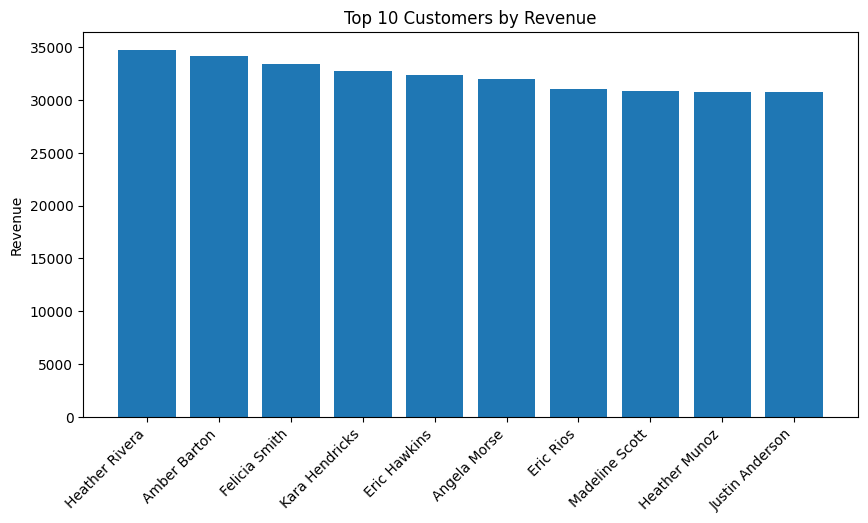

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top_customers["name"], top_customers["total_amount"])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue")
plt.show()


## What are the top-selling product categories?

In [18]:
top_categories = (
    orders.merge(products, on="product_id")
    .groupby("category")["quantity"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print(top_categories)


      category  quantity
0       Sports      8071
1        Books      6812
2         Home      6770
3      Fashion      6513
4  Electronics      5957
5         Toys      5758


## 3 What’s the repeat purchase rate?

- Repeat Purchase Rate = % of customers who placed >1 order

In [19]:
customer_order_counts = orders.groupby("customer_id")["order_id"].nunique()
repeat_customers = (customer_order_counts > 1).sum()
total_customers = customers["customer_id"].nunique()
repeat_rate = repeat_customers / total_customers * 100

print(f"Repeat Purchase Rate: {repeat_rate:.2f}%")


Repeat Purchase Rate: 100.00%


## What is the average order value (AOV) trend?

- AOV = total_amount / number of orders over time

In [20]:
orders["month"] = orders["order_date"].dt.to_period("M")
aov_trend = (
    orders.groupby("month")["total_amount"]
    .mean()
    .reset_index()
)

print(aov_trend)


      month  total_amount
0   2023-09    492.406297
1   2023-10    495.685194
2   2023-11    482.257823
3   2023-12    483.218291
4   2024-01    473.937225
5   2024-02    458.664800
6   2024-03    491.407138
7   2024-04    488.445973
8   2024-05    475.082731
9   2024-06    494.427556
10  2024-07    497.713864
11  2024-08    486.340738
12  2024-09    462.505012
13  2024-10    458.109359
14  2024-11    492.185985
15  2024-12    472.139152
16  2025-01    456.882192
17  2025-02    480.847312
18  2025-03    470.536773
19  2025-04    500.308666
20  2025-05    477.944958
21  2025-06    477.610025
22  2025-07    467.214709
23  2025-08    494.754531
24  2025-09    472.514205


## 5️ Which region generates the most revenue?

- Assuming location = city → we’ll treat it as "region".

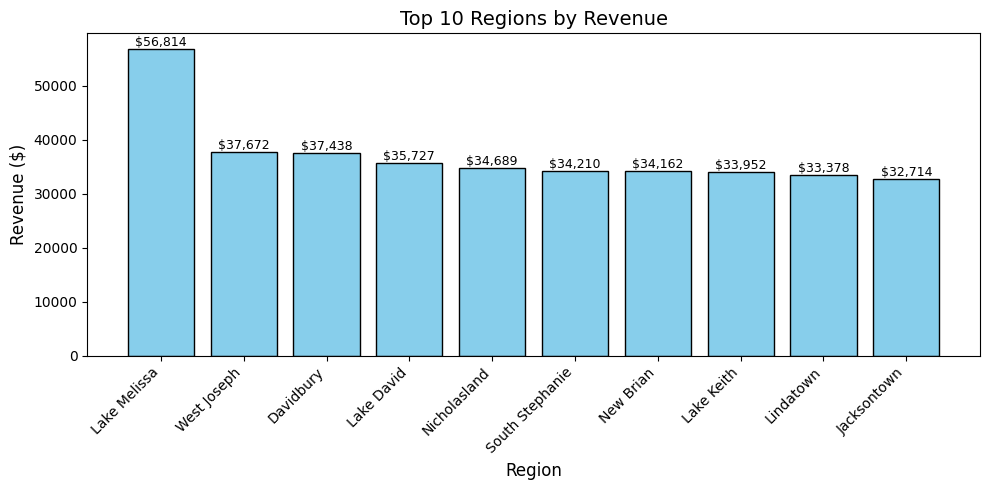

In [23]:
# Merge orders with customers to get location info
region_revenue = (
    orders.merge(customers, on="customer_id")
    .groupby("location")["total_amount"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Now you can safely plot
top_regions = region_revenue.head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top_regions["location"], top_regions["total_amount"], color="skyblue", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Regions by Revenue", fontsize=14)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xlabel("Region", fontsize=12)

# Add value labels
for i, val in enumerate(top_regions["total_amount"]):
    plt.text(i, val, f"${val:,.0f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()
